In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
data=pd.read_csv('model/classifier_data.csv')

In [38]:
data.to_csv('model/classifier_data.csv',index=False)

In [39]:
data

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,AppliedAmount,Amount,...,CreditScoreEsMicroL,CreditScoreEeMini,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Default
0,0,0,115.0410,True,2.0,0,61,1.0,319.5582,115.0408,...,0,1000.0,115.0408,20.4222,0.00,0.00,1,83.0852,0,0
1,0,0,140.6057,False,2.0,0,48,1.0,191.7349,140.6057,...,0,1000.0,140.6057,2.0227,0.00,0.00,2,255.6467,0,0
2,0,0,319.5580,True,2.0,0,58,1.0,319.5582,319.5409,...,0,1000.0,203.1909,59.7626,116.35,414.07,0,0.0000,0,1
3,0,0,57.5205,True,2.0,0,23,1.0,127.8233,57.5205,...,0,1000.0,57.5205,18.7323,0.00,0.00,1,134.2144,0,0
4,0,0,319.5582,True,2.0,0,25,1.0,319.5582,319.5436,...,0,1000.0,319.5436,220.4200,0.00,0.00,1,146.9966,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77389,2515,0,485.0000,True,3.0,2,37,0.0,3000.0000,3000.0000,...,0,1000.0,2308.1900,0.0000,0.00,0.00,0,0.0000,0,1
77390,1880,0,1120.0000,False,3.0,2,35,0.0,3000.0000,3000.0000,...,0,1000.0,3000.0000,1990.0300,0.00,0.00,1,3000.0000,0,0
77391,1975,0,525.0000,True,1.0,2,40,0.0,2500.0000,2500.0000,...,0,1000.0,1869.7600,199.3300,630.24,1227.98,0,0.0000,0,1
77392,1840,0,1160.0000,False,4.0,0,47,1.0,3000.0000,3000.0000,...,0,1000.0,2257.5400,561.5300,0.00,0.00,1,500.0000,0,1


# EMI CALCULATION

In [40]:
loan_data_temp = data[['LoanDuration', 'Interest', 'Amount']]
loan_data_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77394 entries, 0 to 77393
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LoanDuration  77394 non-null  int64  
 1   Interest      77394 non-null  float64
 2   Amount        77394 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 1.8 MB


In [41]:
loan_data_temp.isnull().sum()

LoanDuration    0
Interest        0
Amount          0
dtype: int64

In [42]:
result_1 = np.empty(0)
result_2 = np.empty(0)
result = np.empty(0)

In [43]:
def emi_cal(P,r,n):
    P=P.values
    n=n.values
    r=r.values
    result_1 = np.empty(0)
    result_2 = np.empty(0)
    result = np.empty(0)
    for i in range(P.shape[0]):
        result_1 = np.append(result_1, P[i] * r[i] * np.power((1 + r[i]),n[i]))
        result_2 = np.append(result_2, np.power((1 + r[i]),n[i]) - 1)
        result = np.append(result, (result_1[i] / result_2[i]))
    return result
    

In [44]:
loan_data_temp['EMI'] = emi_cal(loan_data_temp['Amount'], loan_data_temp['Interest'], loan_data_temp['LoanDuration'])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8604\358423895.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_temp['EMI'] = emi_cal(loan_data_temp['Amount'], loan_data_temp['Interest'], loan_data_temp['LoanDuration'])


In [45]:
data['EMI'] = loan_data_temp['EMI']

In [46]:
data['EMI']

0         3451.2240
1         3655.7482
2         7988.5225
3         2588.4225
4         9586.3080
            ...    
77389    93030.0000
77390    54750.0000
77391    62075.0000
77392    53220.0000
77393    91500.0000
Name: EMI, Length: 77394, dtype: float64

# ELIGIBLE LOAN AMOUNT

In [47]:
loan_data_temp = data[['AppliedAmount', 'Interest', 'IncomeTotal', 'LiabilitiesTotal', 'LoanDuration']]
loan_data_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77394 entries, 0 to 77393
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AppliedAmount     77394 non-null  float64
 1   Interest          77394 non-null  float64
 2   IncomeTotal       77394 non-null  float64
 3   LiabilitiesTotal  77394 non-null  float64
 4   LoanDuration      77394 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 3.0 MB


In [48]:
loan_data_temp['Ava_Income'] = ((loan_data_temp['IncomeTotal']-loan_data_temp['LiabilitiesTotal'])*0.3)
loan_data_temp['Total_Loan_Amnt'] = np.round((data['AppliedAmount'] + (data['AppliedAmount'] * data['Interest']) /100)*data['LoanDuration'])
loan_data_temp.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8604\2766464140.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_temp['Ava_Income'] = ((loan_data_temp['IncomeTotal']-loan_data_temp['LiabilitiesTotal'])*0.3)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_8604\2766464140.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_temp['Total_Loan_Amnt'] = np.round((data['AppliedAmount'] + (data['AppliedAmount'] * data['Interest']) /100)*data['LoanDuration'])


,AppliedAmount,Interest,IncomeTotal,LiabilitiesTotal,LoanDuration,Ava_Income,Total_Loan_Amnt
0,319.5582,30.0,10500.0,0.0,12,3150.0,4985.0
1,191.7349,25.0,10800.0,0.0,1,3240.0,240.0
2,319.5582,25.0,7000.0,0.0,20,2100.0,7989.0
3,127.8233,45.0,11600.0,0.0,15,3480.0,2780.0
4,319.5582,30.0,6800.0,0.0,12,2040.0,4985.0


In [49]:
def eligible_loan_amnt(df):
  Ava_Income = df['Ava_Income'].values
  Total_Loan_Amnt = df['Total_Loan_Amnt'].values
  ELA = np.empty(0)
  for i in range(len(Ava_Income)):
    if Total_Loan_Amnt[i] <= Ava_Income[i]:
      ELA = np.append(ELA, Total_Loan_Amnt[i])
    else:
      ELA = np.append(ELA, Ava_Income[i])
  return ELA

In [50]:
eligible_loan_amnt(loan_data_temp)

array([3150.   ,  240.   , 2100.   , ...,  345.   ,  -57.615,   -9.309])

In [51]:
loan_data_temp['ELA']=eligible_loan_amnt(loan_data_temp)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8604\2663748889.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_temp['ELA']=eligible_loan_amnt(loan_data_temp)


In [52]:
loan_data_temp


,AppliedAmount,Interest,IncomeTotal,LiabilitiesTotal,LoanDuration,Ava_Income,Total_Loan_Amnt,ELA
0,319.5582,30.00,10500.0,0.00,12,3150.000,4985.0,3150.000
1,191.7349,25.00,10800.0,0.00,1,3240.000,240.0,240.000
2,319.5582,25.00,7000.0,0.00,20,2100.000,7989.0,2100.000
3,127.8233,45.00,11600.0,0.00,15,3480.000,2780.0,2780.000
4,319.5582,30.00,6800.0,0.00,12,2040.000,4985.0,2040.000
...,...,...,...,...,...,...,...,...
77389,3000.0000,31.01,1400.0,500.00,60,270.000,235818.0,270.000
77390,3000.0000,18.25,2265.0,1777.46,60,146.262,212850.0,146.262
77391,2500.0000,24.83,2500.0,1350.00,60,345.000,187245.0,345.000
77392,3000.0000,17.74,540.0,732.05,60,-57.615,211932.0,-57.615


In [53]:
data['ELA'] = loan_data_temp['ELA']
data.columns

Index(['BidsPortfolioManager', 'BidsApi', 'BidsManual', 'NewCreditCustomer',
       'VerificationType', 'LanguageCode', 'Age', 'Gender', 'AppliedAmount',
       'Amount', 'Interest', 'LoanDuration', 'MonthlyPayment', 'UseOfLoan',
       'Education', 'MaritalStatus', 'EmploymentStatus',
       'EmploymentDurationCurrentEmployer', 'OccupationArea',
       'HomeOwnershipType', 'IncomeTotal', 'ExistingLiabilities',
       'LiabilitiesTotal', 'RefinanceLiabilities', 'DebtToIncome', 'FreeCash',
       'MonthlyPaymentDay', 'RecoveryStage', 'Rating', 'Restructured',
       'CreditScoreEsMicroL', 'CreditScoreEeMini', 'PrincipalPaymentsMade',
       'InterestAndPenaltyPaymentsMade', 'PrincipalBalance',
       'InterestAndPenaltyBalance', 'NoOfPreviousLoansBeforeLoan',
       'AmountOfPreviousLoansBeforeLoan',
       'PreviousEarlyRepaymentsCountBeforeLoan', 'Default', 'EMI', 'ELA'],
      dtype='object')

# ROI

In [54]:
loan_data_temp = data[['Amount', 'Interest']]
loan_data_temp.head()

,Amount,Interest
0,115.0408,30.0
1,140.6057,25.0
2,319.5409,25.0
3,57.5205,45.0
4,319.5436,30.0


In [55]:
loan_data_temp['InterestAmount'] = (loan_data_temp['Amount']*(loan_data_temp['Interest']/100))
loan_data_temp['TotalAmount'] = (loan_data_temp['InterestAmount'] + loan_data_temp['Amount'])
loan_data_temp['ROI'] = (loan_data_temp['InterestAmount'] / loan_data_temp['TotalAmount'])*100
data['ROI'] = loan_data_temp['ROI']

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8604\1410257352.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_temp['InterestAmount'] = (loan_data_temp['Amount']*(loan_data_temp['Interest']/100))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_8604\1410257352.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_temp['TotalAmount'] = (loan_data_temp['InterestAmount'] + loan_data_temp['Amount'])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_8604\1410257352.py:3: SettingWithCopyWarning: 
A value is 

In [56]:
data.head()

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,AppliedAmount,Amount,...,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Default,EMI,ELA,ROI
0,0,0,115.0410,True,2.0,0,61,1.0,319.5582,115.0408,...,20.4222,0.00,0.00,1,83.0852,0,0,3451.2240,3150.0,23.076923
1,0,0,140.6057,False,2.0,0,48,1.0,191.7349,140.6057,...,2.0227,0.00,0.00,2,255.6467,0,0,3655.7482,240.0,20.000000
2,0,0,319.5580,True,2.0,0,58,1.0,319.5582,319.5409,...,59.7626,116.35,414.07,0,0.0000,0,1,7988.5225,2100.0,20.000000
3,0,0,57.5205,True,2.0,0,23,1.0,127.8233,57.5205,...,18.7323,0.00,0.00,1,134.2144,0,0,2588.4225,2780.0,31.034483
4,0,0,319.5582,True,2.0,0,25,1.0,319.5582,319.5436,...,220.4200,0.00,0.00,1,146.9966,0,1,9586.3080,2040.0,23.076923


In [57]:
loan_data_temp

,Amount,Interest,InterestAmount,TotalAmount,ROI
0,115.0408,30.00,34.512240,149.553040,23.076923
1,140.6057,25.00,35.151425,175.757125,20.000000
2,319.5409,25.00,79.885225,399.426125,20.000000
3,57.5205,45.00,25.884225,83.404725,31.034483
4,319.5436,30.00,95.863080,415.406680,23.076923
...,...,...,...,...,...
77389,3000.0000,31.01,930.300000,3930.300000,23.669949
77390,3000.0000,18.25,547.500000,3547.500000,15.433404
77391,2500.0000,24.83,620.750000,3120.750000,19.891052
77392,3000.0000,17.74,532.200000,3532.200000,15.067097


In [58]:
data.dtypes

BidsPortfolioManager                        int64
BidsApi                                     int64
BidsManual                                float64
NewCreditCustomer                            bool
VerificationType                          float64
LanguageCode                                int64
Age                                         int64
Gender                                    float64
AppliedAmount                             float64
Amount                                    float64
Interest                                  float64
LoanDuration                                int64
MonthlyPayment                            float64
UseOfLoan                                   int64
Education                                 float64
MaritalStatus                               int64
EmploymentStatus                            int64
EmploymentDurationCurrentEmployer           int64
OccupationArea                              int64
HomeOwnershipType                           int64


In [59]:
cat_cols=['NewCreditCustomer','VerificationType','LanguageCode','Gender','UseOfLoan','Education','MaritalStatus','EmploymentStatus','OccupationArea',
'HomeOwnershipType','RecoveryStage','Rating','Restructured','Default','CreditScoreEsMicroL']
for i in cat_cols:
    data[i]=data[i].astype('category')

In [60]:
data.dtypes

BidsPortfolioManager                         int64
BidsApi                                      int64
BidsManual                                 float64
NewCreditCustomer                         category
VerificationType                          category
LanguageCode                              category
Age                                          int64
Gender                                    category
AppliedAmount                              float64
Amount                                     float64
Interest                                   float64
LoanDuration                                 int64
MonthlyPayment                             float64
UseOfLoan                                 category
Education                                 category
MaritalStatus                             category
EmploymentStatus                          category
EmploymentDurationCurrentEmployer            int64
OccupationArea                            category
HomeOwnershipType              

# HANDLING OUTLIERS

In [61]:
df_IQR = data[data.select_dtypes([float, int]).columns].quantile(.75) - data[data.select_dtypes([float, int]).columns].quantile(.25)

df_IQR

BidsPortfolioManager                        1383.000000
BidsApi                                        5.000000
BidsManual                                   726.000000
Age                                           18.000000
AppliedAmount                               2980.000000
Amount                                      2445.000000
Interest                                      26.910000
LoanDuration                                  24.000000
MonthlyPayment                               119.037500
EmploymentDurationCurrentEmployer              3.000000
IncomeTotal                                 1110.000000
ExistingLiabilities                            4.000000
LiabilitiesTotal                             622.960000
RefinanceLiabilities                           0.000000
DebtToIncome                                  20.790000
FreeCash                                     269.007500
MonthlyPaymentDay                             11.000000
CreditScoreEeMini                              0

In [62]:
# Let's compute maximum and minimum limits
df_Max =  data[data.select_dtypes([float, int]).columns].quantile(.75) + (1.5*df_IQR)
df_Min =  data[data.select_dtypes([float, int]).columns].quantile(.25) - (1.5*df_IQR)

In [63]:
# Loop for replacing outliers above upper bound with the upper bound value:
for column in data.select_dtypes([float, int]).columns :
    col_IQR = data[column].quantile(.75) - data[column].quantile(.25)
    col_Max =  data[column].quantile(.75) + (1.5*col_IQR)
    data[column][data[column] > col_Max] =  col_Max

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8604\1605457818.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column][data[column] > col_Max] =  col_Max


In [64]:
# Loop for replacing outliers under lower bound with the lower bound value:
for column in data.select_dtypes([float, int]).columns :
    col_IQR = data[column].quantile(.75) - data[column].quantile(.25)
    col_Min =  data[column].quantile(.25) - (1.5*col_IQR)
    data[column][data[column] < col_Min] =  col_Min

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8604\2933995268.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column][data[column] < col_Min] =  col_Min


In [65]:
num_data=data.select_dtypes(include=['int','float'])
num_data

,BidsPortfolioManager,BidsApi,BidsManual,Age,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,EmploymentDurationCurrentEmployer,...,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,EMI,ELA,ROI
0,0.0,0.0,115.0410,61,319.5582,115.0408,30.00,12,101.13,0,...,115.0408,20.4222,0.00,0.0000,1.0,83.0852,0,3451.2240,856.650,23.076923
1,0.0,0.0,140.6057,48,191.7349,140.6057,25.00,1,101.13,1,...,140.6057,2.0227,0.00,0.0000,2.0,255.6467,0,3655.7482,240.000,20.000000
2,0.0,0.0,319.5580,58,319.5582,319.5409,25.00,20,101.13,2,...,203.1909,59.7626,116.35,414.0700,0.0,0.0000,0,7988.5225,856.650,20.000000
3,0.0,0.0,57.5205,23,127.8233,57.5205,45.00,15,101.13,0,...,57.5205,18.7323,0.00,0.0000,1.0,134.2144,0,2588.4225,856.650,31.034483
4,0.0,0.0,319.5582,25,319.5582,319.5436,30.00,12,101.13,0,...,319.5436,220.4200,0.00,0.0000,1.0,146.9966,0,9586.3080,856.650,23.076923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77389,2515.0,0.0,485.0000,37,3000.0000,3000.0000,31.01,60,107.68,1,...,2308.1900,0.0000,0.00,0.0000,0.0,0.0000,0,93030.0000,270.000,23.669949
77390,1880.0,0.0,1120.0000,35,3000.0000,3000.0000,18.25,60,85.33,1,...,3000.0000,1474.8625,0.00,0.0000,1.0,3000.0000,0,54750.0000,146.262,15.433404
77391,1975.0,0.0,525.0000,40,2500.0000,2500.0000,24.83,60,80.42,1,...,1869.7600,199.3300,630.24,1227.9800,0.0,0.0000,0,62075.0000,345.000,19.891052
77392,1840.0,0.0,1160.0000,47,3000.0000,3000.0000,17.74,60,84.51,1,...,2257.5400,561.5300,0.00,0.0000,1.0,500.0000,0,53220.0000,-57.615,15.067097


In [66]:
data.drop('MonthlyPaymentDay',inplace=True,axis=1)

In [67]:
num_cols=data.select_dtypes(include=['int','float']).columns
num_cols

Index(['BidsPortfolioManager', 'BidsApi', 'BidsManual', 'Age', 'AppliedAmount',
       'Amount', 'Interest', 'LoanDuration', 'MonthlyPayment',
       'EmploymentDurationCurrentEmployer', 'IncomeTotal',
       'ExistingLiabilities', 'LiabilitiesTotal', 'RefinanceLiabilities',
       'DebtToIncome', 'FreeCash', 'CreditScoreEeMini',
       'PrincipalPaymentsMade', 'InterestAndPenaltyPaymentsMade',
       'PrincipalBalance', 'InterestAndPenaltyBalance',
       'NoOfPreviousLoansBeforeLoan', 'AmountOfPreviousLoansBeforeLoan',
       'PreviousEarlyRepaymentsCountBeforeLoan', 'EMI', 'ELA', 'ROI'],
      dtype='object')

In [68]:
cat_data=data.select_dtypes(exclude=['int','float'])
cat_data

,NewCreditCustomer,VerificationType,LanguageCode,Gender,UseOfLoan,Education,MaritalStatus,EmploymentStatus,OccupationArea,HomeOwnershipType,RecoveryStage,Rating,Restructured,CreditScoreEsMicroL,Default
0,True,2.0,0,1.0,0,3.0,0,0,0,-1,2.0,0,False,0,0
1,False,2.0,0,1.0,0,5.0,1,0,1,-1,2.0,0,False,0,0
2,True,2.0,0,1.0,1,4.0,0,0,2,-1,2.0,0,True,0,1
3,True,2.0,0,1.0,2,2.0,2,1,3,-1,2.0,0,False,0,0
4,True,2.0,0,1.0,3,4.0,3,0,0,-1,2.0,0,False,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77389,True,3.0,2,0.0,2,3.0,2,0,3,4,2.0,4,False,0,1
77390,False,3.0,2,0.0,1,3.0,2,0,6,5,1.0,6,False,0,0
77391,True,1.0,2,0.0,2,3.0,0,1,7,5,2.0,0,False,0,1
77392,False,4.0,0,1.0,0,5.0,0,0,9,1,2.0,6,True,0,1


In [69]:
data=num_data.join(cat_data)
data.to_csv('regression_data.csv',index=False)

In [70]:
from sklearn.preprocessing import StandardScaler
# scaler_num = StandardScaler()
# #it the scaler to the train set, it will learn the parameters
# scaler_num.fit(data[num_cols])
# # # transform train and test sets
# data[num_cols] = scaler_num.transform(data[num_cols])

In [71]:
# creating dummy variables for categorical features
cat_data = pd.get_dummies(data[cat_cols],drop_first=True)
cat_data

,NewCreditCustomer_True,VerificationType_1.0,VerificationType_2.0,VerificationType_3.0,VerificationType_4.0,LanguageCode_1,LanguageCode_2,LanguageCode_3,Gender_1.0,Gender_2.0,...,CreditScoreEsMicroL_1,CreditScoreEsMicroL_2,CreditScoreEsMicroL_3,CreditScoreEsMicroL_4,CreditScoreEsMicroL_5,CreditScoreEsMicroL_6,CreditScoreEsMicroL_7,CreditScoreEsMicroL_8,CreditScoreEsMicroL_9,CreditScoreEsMicroL_10
0,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77389,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77390,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77391,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77392,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
#data=data.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [73]:
# Splitting Independent and Dependent Variables
X = data.drop(['EMI', 'ELA', 'ROI'], axis=1)
y = data[['EMI', 'ELA', 'ROI']]

In [74]:
scaler_x = StandardScaler()
num_colsx=X.select_dtypes(include=['int','float']).columns
#it the scaler to the train set, it will learn the parameters
scaler_x.fit(X[num_colsx])
# # transform train and test sets
X[num_colsx] = scaler_x.transform(X[num_colsx])

In [75]:
X

,BidsPortfolioManager,BidsApi,BidsManual,Age,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,EmploymentDurationCurrentEmployer,...,Education,MaritalStatus,EmploymentStatus,OccupationArea,HomeOwnershipType,RecoveryStage,Rating,Restructured,CreditScoreEsMicroL,Default
0,-0.987907,-0.634605,-0.670207,1.755523,-1.067245,-1.234105,-0.380977,-1.975685,-0.190333,-1.219078,...,3.0,0,0,0,-1,2.0,0,False,0,0
1,-0.987907,-0.634605,-0.624746,0.688412,-1.125850,-1.220032,-0.629927,-2.645915,-0.190333,-0.711597,...,5.0,1,0,1,-1,2.0,0,False,0,0
2,-0.987907,-0.634605,-0.306518,1.509267,-1.067245,-1.121537,-0.629927,-1.488245,-0.190333,-0.204116,...,4.0,0,0,2,-1,2.0,0,True,0,1
3,-0.987907,-0.634605,-0.772495,-1.363725,-1.155152,-1.265767,0.365875,-1.792895,-0.190333,-1.219078,...,2.0,2,1,3,-1,2.0,0,False,0,0
4,-0.987907,-0.634605,-0.306517,-1.199554,-1.067245,-1.121535,-0.380977,-1.975685,-0.190333,-1.219078,...,4.0,3,0,0,-1,2.0,0,False,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77389,1.289795,-0.634605,-0.012315,-0.214528,0.161695,0.353931,-0.330689,0.948954,-0.120103,-0.711597,...,3.0,2,0,3,4,2.0,4,False,0,1
77390,0.714710,-0.634605,1.116897,-0.378699,0.161695,0.353931,-0.966010,0.948954,-0.359743,-0.711597,...,3.0,2,0,6,5,1.0,6,False,0,0
77391,0.800746,-0.634605,0.058817,0.031728,-0.067547,0.078704,-0.638392,0.948954,-0.412389,-0.711597,...,3.0,0,1,7,5,2.0,0,False,0,1
77392,0.678484,-0.634605,1.188028,0.606327,0.161695,0.353931,-0.991403,0.948954,-0.368536,-0.711597,...,5.0,0,0,9,1,2.0,6,True,0,1


In [76]:
scaler_y = StandardScaler()
#it the scaler to the train set, it will learn the parameters
scaler_y.fit(y)
# # transform train and test sets
y = scaler_y.transform(y)

In [78]:
y

array([[-1.13205055,  2.39030392, -0.30065735],
       [-1.12933021, -0.21590107, -0.59578074],
       [-1.07170074,  2.39030392, -0.59578074],
       ...,
       [-0.35230603,  0.22787015, -0.60623051],
       [-0.47008483, -1.47373891, -1.06892063],
       [ 0.03907071, -1.26957878, -0.27238882]])

# MODEL BUILDING

# SPLITTING DATA

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .80)

In [80]:
print(X_train.shape,X_test.shape)

(61915, 40) (15479, 40)


In [81]:
print(y_train.shape,y_test.shape)

(61915, 3) (15479, 3)


***
# RANDOM FOREST REGRESSOR
***

In [82]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 500, random_state = 0,max_depth=20)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=500, random_state=0)

In [83]:
y_predrf =model.predict(X_test)

In [84]:
print(y_predrf[0:6])

[[ 0.51040857  0.79705861  1.07182678]
 [ 0.16941559 -0.14016213  0.04951563]
 [ 0.05800783 -0.83980314 -0.3477527 ]
 [-1.12900756  2.21895499  0.18644233]
 [ 0.88069885  0.03365211  1.52683901]
 [-0.18015141  0.227003   -1.28067628]]


In [85]:
print(y_test[0:6])

[[ 0.51026903  0.79843315  1.07260039]
 [ 0.07456316 -0.11300954 -0.01740962]
 [ 0.05636179 -0.85619955 -0.3578518 ]
 [-1.12694405  2.39030392  0.2263487 ]
 [ 0.88008553  0.03768248  1.52614242]
 [-0.13890708  0.32443477 -1.28920743]]


# GETTING BACK PREDICT VALUE

In [86]:
y_result = scaler_y.inverse_transform(y_predrf)

In [87]:
np.round(y_result)

array([[1.26937e+05, 4.80000e+02, 3.70000e+01],
       [1.01300e+05, 2.58000e+02, 2.70000e+01],
       [9.29240e+04, 9.20000e+01, 2.30000e+01],
       ...,
       [2.04852e+05, 7.23000e+02, 3.60000e+01],
       [1.82970e+04, 6.30000e+01, 2.50000e+01],
       [5.64020e+04, 1.81000e+02, 2.20000e+01]])

# Model Evaluation

In [88]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

In [89]:
# model evaluation
print('Model Evaluation:')
print('mean_squared_error : ', mean_squared_error(y_test, y_predrf))
print('mean_absolute_percentage_error : ', mean_absolute_percentage_error(y_test, y_predrf))
print('R2_score : ', r2_score(y_test, y_predrf))

Model Evaluation:
mean_squared_error :  0.014485464782905457
mean_absolute_percentage_error :  0.2938833060807376
R2_score :  0.9854011016883636


Text(0.5, 1.0, 'Residual plot')

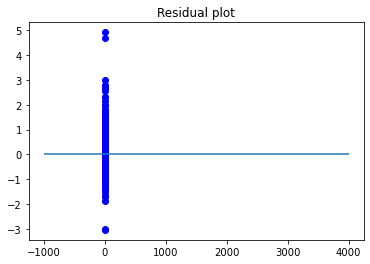

In [90]:
x_plot = plt.scatter(y_predrf, (y_predrf - y_test), c='b')

plt.hlines(y=0, xmin= -1000, xmax=4000)

plt.title('Residual plot')

***

# XGBOOST REGRESSOR

In [91]:
import pandas as pd
import xgboost as xg

C:\Users\ASUS\anaconda3\lib\site-packages\xgboost\compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [92]:
#xgb.fit(X_train,y_train,eval_metric='mse')
from sklearn.multioutput import MultiOutputRegressor
multioutputregressor=MultiOutputRegressor(xg.XGBRegressor(objective='reg:squarederror',n_estimators=800,reg_lambda=1,gamma=0,max_depth=20,learning_rate=.5))
MultiOutputRegressor(multioutputregressor.fit(X_train, y_train))


C:\Users\ASUS\anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


ValueError: DataFrame.dtypes for data must be int, float, bool or categorical.  When
                categorical type is supplied, DMatrix parameter
                `enable_categorical` must be set to `True`.NewCreditCustomer, VerificationType, LanguageCode, Gender, UseOfLoan, Education, MaritalStatus, EmploymentStatus, OccupationArea, HomeOwnershipType, RecoveryStage, Rating, Restructured, CreditScoreEsMicroL, Default

In [ ]:
y_pred=multioutputregressor.predict(X_test)


In [ ]:
y_pred

In [ ]:
mse=mean_squared_error(y_test,y_pred)

In [ ]:
mse

In [ ]:
print(y_test.shape,len(y_pred))

In [ ]:
r2_score(y_test,y_pred)

In [ ]:
x_plot = plt.scatter(y_pred, (y_pred - y_test), c='b')

plt.hlines(y=0, xmin= -1000, xmax=5000)

plt.title('Residual plot')

In [ ]:
import pickle
pickle.dump(multioutputregressor,open('C:/Users/ASUS/technocolabs/ML_DEPLOYMENT_MODELS/regression_xgboost.pkl',"wb"))

***
# LINEAR REGRESSION
***

In [ ]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

lreg.fit(X_train, y_train)

In [ ]:
y_predlr = model.predict(X_test)

In [ ]:

# model evaluation
print('Model Evaluation for linear regression:')
print('mean_squared_error : ', mean_squared_error(y_test, y_predlr))
print('mean_squared_percentage_error : ', mean_absolute_percentage_error(y_test, y_predlr, multioutput=[0.4, 0.5, 0.7]))
print('R2_score : ', r2_score(y_test, y_predlr))

its not good model as r2-score is very good(95%). only 95% of variance in targets is explained by our input data. In other words, we’ll have 60% information to make an accurate prediction about its targets(emi,ela,roi).

In [ ]:
#calculating coefficients

coeff = pd.DataFrame(X_train.columns)
coeff['Coefficient Estimate'] = pd.Series(lreg.coef_[0])
coeff



In [ ]:
lreg.coef_

In [ ]:
x_plot = plt.scatter(y_predlr, (y_predlr - y_test), c='b')

plt.hlines(y=0, xmin= -1000, xmax=5000)

plt.title('Residual plot')

In [ ]:
predictors = X_train.columns

coef = pd.Series(lreg.coef_[0],predictors).sort_values()

coef.plot(kind='bar', figsize=(18,8),title='Modal Coefficients')

***

Adjusted R-square
The only drawback of R2 is that if new predictors (X) are added to our model, R2 only increases or remains constant but it never decreases. We can not judge that by increasing complexity of our model, are we making it more accurate?

That is why, we use “Adjusted R-Square”.

The Adjusted R-Square is the modified form of R-Square that has been adjusted for the number of predictors in the model. It incorporates model’s degree of freedom. The adjusted R-Square only increases if the new term improves the model accuracy.

***
# RIDGE REGRESSION

In [ ]:
from sklearn.linear_model import Ridge
ridgeReg = Ridge()

ridgeReg.fit(X_train,y_train)

In [ ]:
y_predr = ridgeReg.predict(X_test)

In [ ]:
# model evaluation
print('Model Evaluation for ridge regression:')
print('mean_squared_error : ', mean_squared_error(y_test, y_predr))
print('mean_squared_percentage_error : ', mean_absolute_percentage_error(y_test, y_predr, multioutput=[0.4, 0.5, 0.7]))
print('R2_score : ', r2_score(y_test, y_predr))

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rid_reg = Ridge()

param_dist = {"alpha": list(np.array(range(1,9))*0.25)}

random_search = RandomizedSearchCV(ridgeReg, param_distributions=param_dist)

random_search.fit(X_train, y_train)

rid_preds = random_search.best_estimator_.predict(X_test)

In [ ]:
print('Ridge Regression - Best estimator:')
print('Best Estimator: \n', random_search.best_estimator_)
print('mean_squared_error : ', mean_squared_error(y_test, rid_preds))
print('mean_squared_percentage_error : ', mean_absolute_percentage_error(y_test, rid_preds, multioutput=[0.3,0.5, 0.7]))
print('R2_score : ', r2_score(y_test, rid_preds))

# LASSO REGRESSION

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lassoReg = Lasso()

lassoReg.fit(X_train,y_train)

In [ ]:
y_predla = lassoReg.predict(X_test)

In [ ]:
# model evaluation
print('Model Evaluation for ridge regression:')
print('mean_squared_error : ', mean_squared_error(y_test, y_predla))
print('mean_squared_percentage_error : ', mean_absolute_percentage_error(y_test, y_predla, multioutput=[0.4, 0.5, 0.7]))
print('R2_score : ', r2_score(y_test, y_predla))

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
lassoReg = Lasso()

param_dist = {"alpha": list(np.array(range(1,9))*0.25)}

random_search = RandomizedSearchCV(lassoReg, param_distributions=param_dist)

random_search.fit(X_train, y_train)

las_preds = random_search.best_estimator_.predict(X_test)

In [ ]:
print('lasso Regression - Best estimator:')
print('Best Estimator: \n', random_search.best_estimator_)
print('mean_squared_error : ', mean_squared_error(y_test, las_preds))
print('mean_squared_percentage_error : ', mean_absolute_percentage_error(y_test, las_preds, multioutput=[0.3,0.5, 0.7]))
print('R2_score : ', r2_score(y_test, las_preds))

# Elasticnet

In [ ]:
from sklearn.linear_model import ElasticNet

ENreg = ElasticNet(alpha=1, l1_ratio=0.5)

ENreg.fit(X_train,y_train)

el_pred = ENreg.predict(X_test)

In [ ]:
# model evaluation
print('Model Evaluation for elasticnet regression:')
print('mean_squared_error : ', mean_squared_error(y_test, el_pred))
print('mean_squared_percentage_error : ', mean_absolute_percentage_error(y_test, el_pred, multioutput=[0.4, 0.5, 0.7]))
print('R2_score : ', r2_score(y_test, el_pred))

In [ ]:
ENreg = ElasticNet()

param_dist = {"alpha": list(np.array(range(1,9))*0.25),"l1_ratio": list(np.array(range(1,5))*0.15)}

random_search = RandomizedSearchCV(ENreg, param_distributions=param_dist)

random_search.fit(X_train, y_train)

en_preds = random_search.best_estimator_.predict(X_test)

In [ ]:
print('Elastic Regression - Best estimator:')
print('Best Estimator: \n', random_search.best_estimator_)
print('mean_squared_error : ', mean_squared_error(y_test, en_preds))
print('mean_squared_percentage_error : ', mean_absolute_percentage_error(y_test, en_preds, multioutput=[0.3,0.5, 0.7]))
print('R2_score : ', r2_score(y_test, en_preds))

# final model

as above we can see that XGBOOST regressor is best model which have 99 % r2_score(.993)

NOTE: after that i will work(working) on pipeline+deployment then go into webapp using streamlit.
if possible best model will change.